# Identifying the activity from My Runtastic Data
#### Due to my shift of use of tracking app from Runtastic to Strava,I downloaded all my Runtastic Sessions but the json files do not indicate the activty done.Instead,it was just coded categorically as sport_type_id. With slight tweaks of data and some visualization, I was able to identify the activities.
#### Join me in identifying these.

In [155]:
%matplotlib inline
import datetime
import json
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os
from pathlib import Path
os.getcwd()

'/Users/ecuerbo/Desktop/nubian-goat'

In [326]:
paths = Path("/Users/ecuerbo/Desktop/bling-bling/runtastic-files/sessions").glob("*.json")
df = pd.DataFrame([pd.read_json(p, typ="series") for p in paths]).sort_values(by=['start_time'])

df['start'] = pd.to_datetime(df['user_perceived_start_time'],unit='ms')
df['end'] = pd.to_datetime(df['user_perceived_end_time'],unit='ms')
df = df.set_index('start')

df['duration'] = df['duration']/(1000*60)
df = df[~(df['duration'] < 5)] 

df['pause'] = df['pause']/(1000*60)
df['month_year'] = df.index.to_period('M')
df['hour'] = df.index.hour
df['month_name'] = df.index.month_name().str[:3]

days_arr = ["Sun","Mon","Tue", "Wed", "Thu", "Fri", "Sat"]
def get_day_of_week(x):
    return days_arr[x.weekday()]
df['day_of_week'] = df['end'].apply(get_day_of_week)

def is_long(x):
    if x > 15:
        return 'Yes'
    return 'No'
df['long_exercise'] = df['duration'].apply(is_long)

def is_noon(x):
    if x > 12:
        return 'Afternoon'
    return 'Morning'
df['time_of_day'] = df['hour'].apply(is_noon)

df['calories_per_minute'] = (df['calories'] / df['duration']).round(0)

drop = ['version','start_time','end_time',"tracking_method",'start_time_timezone_offset','created_at','updated_at','creation_application_id','plausible','end_time_timezone_offset','features', 'id', 'user_id','user_perceived_end_time','user_perceived_start_time']
df.drop(drop, axis=1, inplace=True)
df.head()

,duration,pause,calories,subjective_feeling,dehydration_volume,sport_type_id,end,month_year,hour,month_name,day_of_week,long_exercise,time_of_day,calories_per_minute
start,,,,,,,,,,,,,,
2017-06-26 13:01:06,5.166667,0.0,17,NaN,NaN,63,2017-06-26 13:06:16,2017-06,13,Jun,Sun,No,Afternoon,3.0
2017-07-02 16:24:09,10.716667,0.0,31,NaN,NaN,63,2017-07-02 16:34:52,2017-07,16,Jul,Sat,No,Afternoon,3.0
2017-07-05 05:51:07,11.983333,0.0,38,NaN,NaN,63,2017-07-05 06:03:06,2017-07,5,Jul,Tue,No,Morning,3.0
2017-07-07 05:01:45,12.983333,0.0,32,NaN,NaN,63,2017-07-07 05:14:44,2017-07,5,Jul,Thu,No,Morning,2.0
2017-07-09 17:50:09,8.683333,0.0,23,NaN,NaN,63,2017-07-09 17:58:50,2017-07,17,Jul,Sat,No,Afternoon,3.0


In [273]:
df.groupby('sport_type_id')['duration'].agg(['count',np.mean,np.median,np.std,'min','max']).round(2)

,count,mean,median,std,min,max
sport_type_id,,,,,,
1,26,51.17,35.01,37.82,9.34,150.63
19,5,87.79,71.94,88.03,18.72,234.19
29,1,309.64,309.64,NaN,309.64,309.64
3,29,90.04,84.31,44.83,16.87,259.56
63,8,10.50,10.78,2.59,5.17,13.07
7,15,25.40,26.96,17.30,8.56,76.23


In [314]:
#check value counts
for x in df.columns:
    print(df[x].value_counts(dropna=False))

5.166667      1
34.016200     1
76.230950     1
56.480917     1
26.994933     1
             ..
106.167500    1
64.717567     1
16.865983     1
150.016667    1
48.407017     1
Name: duration, Length: 78, dtype: int64
0.000000       33
0.019083        1
92.183417       1
0.154733        1
0.017600        1
0.071167        1
0.029733        1
0.999750        1
13.525550       1
0.019550        1
0.021733        1
1440.560367     1
0.029400        1
3.672250        1
276.154483      1
0.088650        1
32.349417       1
44.967950       1
50.067183       1
0.020867        1
0.023700        1
79.918950       1
0.026250        1
0.017550        1
4.490083        1
17.394283       1
0.090833        1
2.818367        1
134.388350      1
15.601217       1
2.684367        1
23.706517       1
16.737933       1
38.462517       1
0.763800        1
0.017350        1
7.820333        1
1.276800        1
21.313950       1
47.028817       1
44.390350       1
0.923467        1
12.036367       1
85.196183

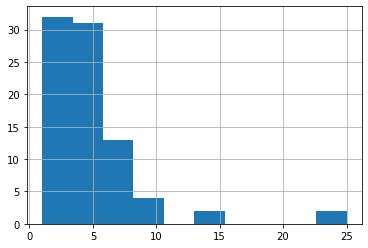

In [239]:
## Calories per Minute
df['calories_per_minute'].hist();

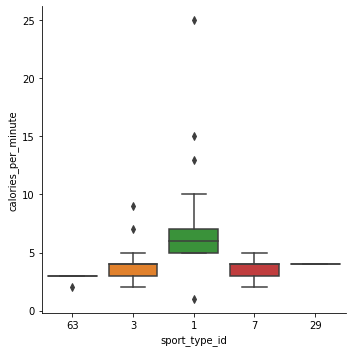

In [252]:
## Sports_ID versus Calories per minute
sns.catplot(x='sport_type_id', y='calories_per_minute', data=df,kind='box');

In [242]:
df[df['calories_per_minute']>10] #looks irregular

,duration,pause,calories,subjective_feeling,dehydration_volume,sport_type_id,end,month_year,month_name,day_of_week,long_exercise,calories_per_minute
start,,,,,,,,,,,,
2019-04-08 17:15:08,54.698733,12.036367,694,awesome,967.0,1,2019-04-08 18:21:53,2019-04,Apr,Sun,Yes,13.0
2019-08-13 04:57:41,234.187467,0.000000,5791,so_so,7951.0,19,2019-08-13 08:51:53,2019-08,Aug,Mon,Yes,25.0
2019-09-08 16:54:28,17.004250,0.000000,256,NaN,355.0,1,2019-09-08 17:11:29,2019-09,Sep,Sat,Yes,15.0
2019-12-27 05:05:09,9.339550,0.027117,237,NaN,407.0,1,2019-12-27 05:14:31,2019-12,Dec,Thu,No,25.0


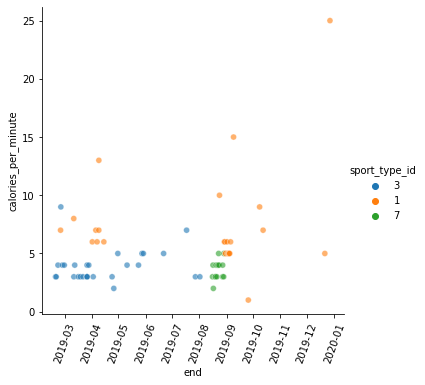

In [312]:
sns.relplot(x='end',y='calories_per_minute', hue='sport_type_id',data=df.loc['2019'], kind='scatter',alpha=0.6)
plt.xticks(rotation=70);

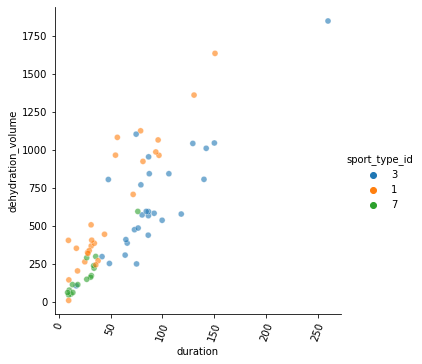

In [306]:
sns.relplot(x='duration',y='dehydration_volume', hue='sport_type_id',data=df.loc['2019'], kind='scatter',alpha=0.6)
plt.xticks(rotation=70);

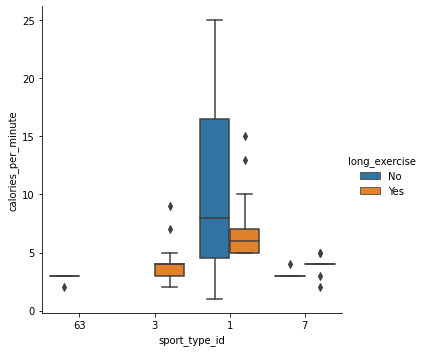

In [309]:
sns.catplot(x='sport_type_id', y='calories_per_minute', hue='long_exercise',data=df, kind='box');

In [305]:
df[df['dehydration_volume']>1250]

,duration,pause,calories,subjective_feeling,dehydration_volume,sport_type_id,end,month_year,hour,month_name,day_of_week,long_exercise,time_of_day,calories_per_minute
start,,,,,,,,,,,,,,
2019-04-01 05:34:37,150.631500,21.313950,833,awesome,1636.0,1,2019-04-01 08:26:33.727,2019-04,5,Apr,Sun,Yes,Morning,6.0
2019-08-01 07:18:00,259.559233,0.154733,778,good,1849.0,3,2019-08-01 11:37:43.000,2019-08,7,Aug,Wed,Yes,Morning,3.0
2019-12-21 06:02:43,130.423400,79.918950,685,NaN,1362.0,1,2019-12-21 09:33:03.541,2019-12,6,Dec,Fri,Yes,Morning,5.0


In [247]:
df[df['sport_type_id']=='19'] #this activity must have been riding a vehicle; not an actual exercise, must be dropped

,duration,pause,calories,subjective_feeling,dehydration_volume,sport_type_id,end,month_year,month_name,day_of_week,long_exercise,calories_per_minute
start,,,,,,,,,,,,
2019-02-06 06:24:33,71.944050,0.000000,232,NaN,501.0,19,2019-02-06 07:36:30,2019-02,Feb,Tue,Yes,3.0
2019-02-07 06:30:51,93.454333,8.997133,352,NaN,716.0,19,2019-02-07 08:13:19,2019-02,Feb,Wed,Yes,4.0
2019-05-22 14:27:00,18.724933,0.025067,31,NaN,83.0,19,2019-05-22 14:45:45,2019-05,May,Tue,Yes,2.0
2019-08-08 09:09:36,20.624133,0.000000,189,awesome,374.0,19,2019-08-08 09:30:14,2019-08,Aug,Wed,Yes,9.0
2019-08-13 04:57:41,234.187467,0.000000,5791,so_so,7951.0,19,2019-08-13 08:51:53,2019-08,Aug,Mon,Yes,25.0


In [276]:
#drop sport_type_id = 19
df = df[~(df['sport_type_id'] == '19')]

In [274]:
df[df['sport_type_id']=='29']  #must have been a vehicle ride too; This was a boat ride

,duration,pause,calories,subjective_feeling,dehydration_volume,sport_type_id,end,month_year,hour,month_name,day_of_week,long_exercise,time_of_day,calories_per_minute
start,,,,,,,,,,,,,,
2019-12-28 13:46:21,309.64475,0.021917,1116,awesome,2405.0,29,2019-12-28 18:56:01,2019-12,13,Dec,Fri,Yes,Afternoon,4.0


In [277]:
df = df[~(df['sport_type_id'] == '29')] #drop this one too.

In [283]:
df.groupby('sport_type_id')['duration'].agg(['count',np.mean,np.median,np.std,'min','max']).round(2)

,count,mean,median,std,min,max
sport_type_id,,,,,,
1,26,51.17,35.01,37.82,9.34,150.63
3,29,90.04,84.31,44.83,16.87,259.56
63,8,10.50,10.78,2.59,5.17,13.07
7,15,25.40,26.96,17.30,8.56,76.23


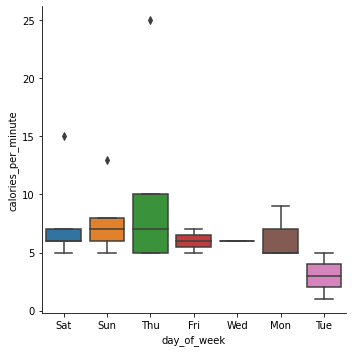

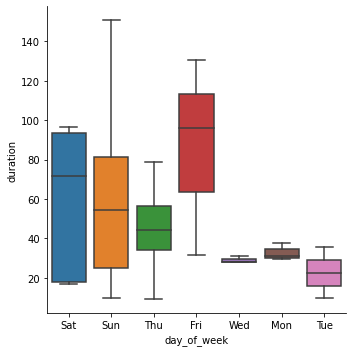

In [313]:
#check sport_type_id = 1
sport1 = df[df['sport_type_id']=='1'] 
sns.catplot(x='day_of_week',y='calories_per_minute', data=sport1, kind='box');
sns.catplot(x='day_of_week',y='duration', data=sport1, kind='box');

<AxesSubplot:>

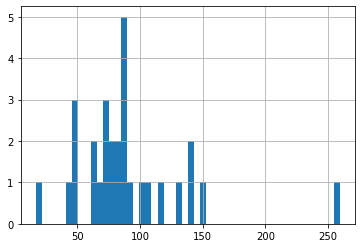

In [287]:
sport3 = df[df['sport_type_id']=='3'] 
sport3['duration'].hist(bins=50)

In [316]:
df[df['month_year']=='2019-08']['sport_type_id'].value_counts()

7    15
1     5
3     1
Name: sport_type_id, dtype: int64

In [319]:
df[df['month_year']=='2019-08'][['sport_type_id','duration','day_of_week']]

,sport_type_id,duration,day_of_week
start,,,
2019-08-01 07:18:00,3,259.559233,Wed
2019-08-15 19:50:06,7,10.153400,Wed
2019-08-16 08:16:48,7,13.232400,Thu
2019-08-16 18:31:54,7,18.350383,Thu
2019-08-18 19:42:00,7,11.736933,Sat
2019-08-19 07:38:16,7,9.578717,Sun
2019-08-19 18:12:17,7,34.016200,Sun
2019-08-20 19:02:06,7,13.620667,Mon
2019-08-21 11:39:51,7,31.449217,Tue


In [320]:
df.groupby('sport_type_id')['calories_per_minute'].mean()

sport_type_id
1     7.346154
3     3.896552
63    2.875000
7     3.600000
Name: calories_per_minute, dtype: float64

In [330]:
#from the crumbs taken from the identification of sport_type_id are:
sport_map = {'1':'running',
                 '7': 'walking',
                 '19': 'car_ride',
                 '29': 'boat_ride',
                 '3':'bike_ride'
                }
df['sport'] = df.sport_type_id.map(sport_map).fillna('others')

In [332]:
df['sport'].value_counts()

bike_ride    29
running      26
walking      15
others        8
car_ride      5
boat_ride     1
Name: sport, dtype: int64

## Activities per Day of the  Week

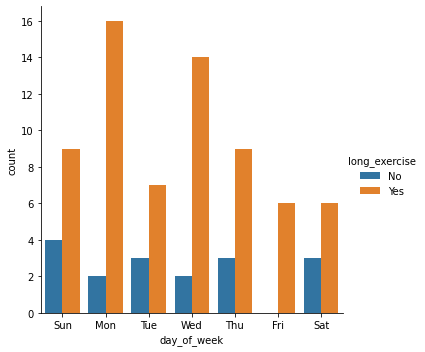

In [333]:
sns.catplot(x='day_of_week', hue='long_exercise',data=df, kind='count', order=days_arr);

## Activities per Month

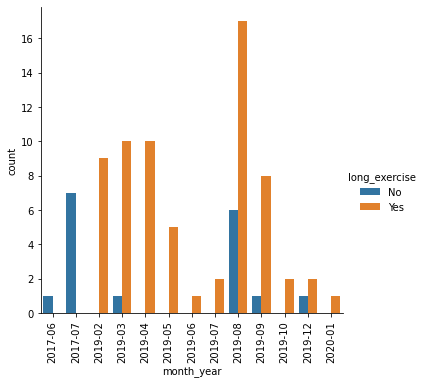

In [334]:
sns.catplot(x='month_year', hue='long_exercise',data=df, kind='count')
plt.xticks(rotation=90)
plt.show()

## Activity Summary

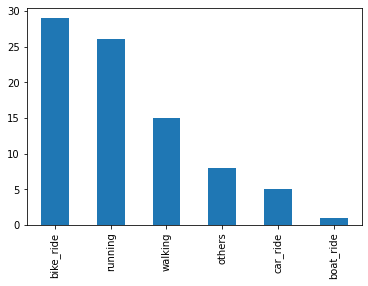

In [341]:
df['sport'].value_counts().plot(kind='bar');